In [2]:
%matplotlib inline

In [9]:
import matplotlib
print(matplotlib.__version__)

3.8.0


# 绘制并定制化图表

## 定义图表类型——柱状图、线形图和堆积柱状图

Matplotlib中的基本图表包括以下元素。
- x轴和y轴：水平和垂直的轴线。
- x轴和y轴刻度：刻度表示坐标轴的分隔，包括最小刻度和最大刻度。
- x轴和y轴刻度标签：表示特定坐标轴的值。
- 绘图区域：实际绘图的区域。

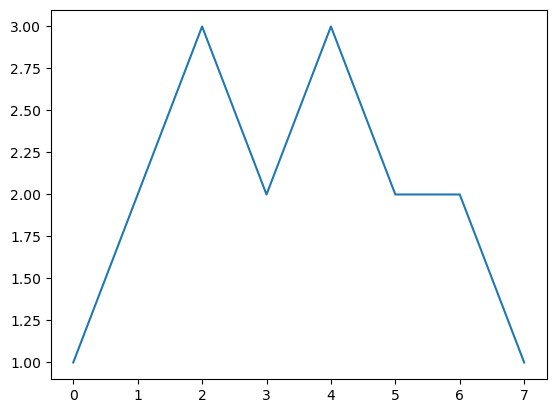

In [8]:
from matplotlib.pyplot import *
plot([1,2,3,2,3,2,2,1]) 

现在，试着通过plot()的第一个参数添加x轴的值

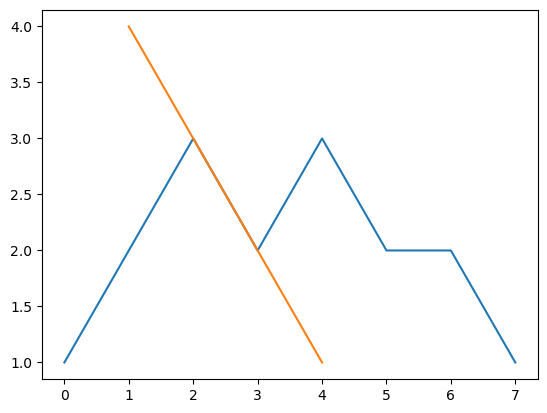

In [3]:
from matplotlib.pyplot import *
plot([1,2,3,2,3,2,2,1]) 
plot([4,3,2,1],[1,2,3,4])

让我们基于相同的数据集合多生成一些常见的图表来做一下比较。

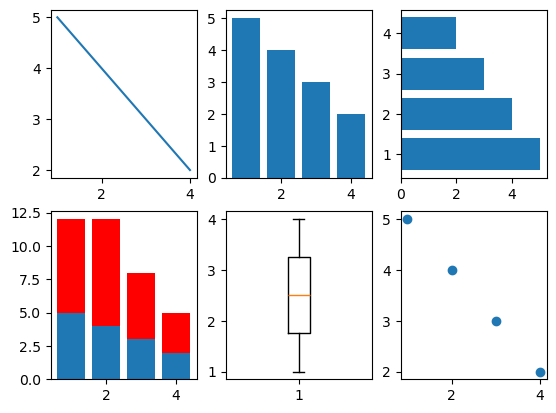

In [4]:
from matplotlib.pyplot import *

# some simple data
x = [1,2,3,4]
y = [5,4,3,2]
# create new figure
figure()

# divide subplots into 2 x 3 grid
# and select #1
subplot(231)
plot(x, y)

# select #2
subplot(232)
bar(x, y)

# horizontal bar-charts
subplot(233)
barh(x, y)

# create stacked bar charts
subplot(234)
bar(x, y)

# we need more data for stacked bar charts
y1 = [7,8,5,3]
bar(x, y1, bottom=y, color = 'r')

# box plot
subplot(235)
boxplot(x)

# scatter plot
subplot(236)
scatter(x,y)

show()

**工作原理**

通过调用figure()方法，我们创建出一个新的图表。如果给该 方法提供一个字符串参数，例如"sample charts"，这个字符串就 会成为窗口的后台标题。如果通过相同的参数（也可以是数字）调用 figure()方法，将会激活相应的图表，并且接下来的绘图操作都在 此图表中进行。 

接下来，调用subplot(231)方法把图表分割成2×3的网格。也 可以用subplot(3,2,1)这种形式来调用，第一个参数是行数，第二 个参数是列数，第三个参数表示图形的标号。 

接着用几个简单的命令创建垂直柱状图（bar()）和水平柱状图 （barh()）。对于堆叠柱状图，我们需要把两个柱状图方法调用连 在一起。通过设置参数bottom=y，把第二个柱状图和前一个柱状图 连接起来形成堆叠柱状图。 

通过调用boxplot()方法可以创建箱线图，图中的箱体从下四分 位数延伸到上四分位数，并带有一条中值线。

最后创建了一个散点图来让大家对基于点的数据集合有所了解。 当一个数据集合中有成千上万的数据点时，散点图很有可能就更合适 了。但这里，我们只是想举例说明相同数据集合的不同展示方式。

## 简单的正弦图和余弦图

我们来计算从-Pi到Pi之间具有相同的线性距离的256个点 的正弦值和余弦值，然后把sin(x)值和cos(x)值在同一个图表中绘制 出来。

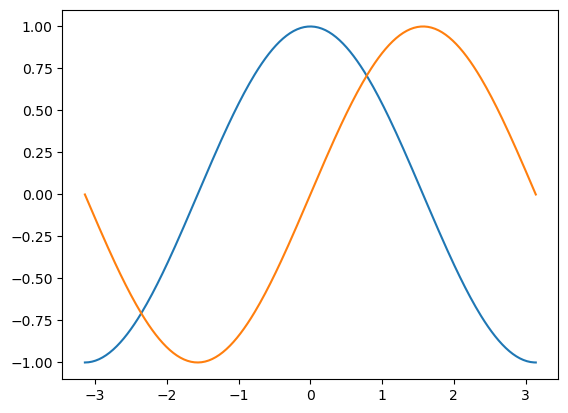

In [5]:
import matplotlib.pyplot as pl
import numpy as np

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)

y = np.cos(x)
y1 = np.sin(x)

pl.plot(x,y)
pl.plot(x, y1)

pl.show()

以这个简单图表为基础，我们可以进一步定制化来添加更多的信息，并且让坐标轴及其边界更精确些。

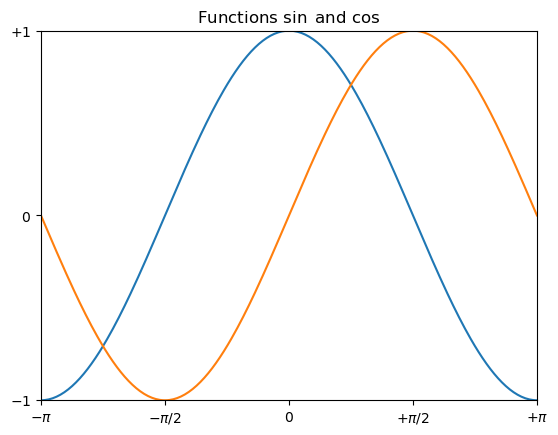

In [9]:
from matplotlib.pylab import *
import numpy as np

# generate uniformly distributed
# 256 points from -pi to pi, inclusive
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)

# these are vectorised versions
# of math.cos, and math.sin in built-in Python maths
# compute cos for every x
y = np.cos(x)

# compute sin for every x
y1 = np.sin(x)

# plot cos
plot(x, y)

# plot sin
plot(x, y1)

# define plot title
title(r"Functions $\sin$ and $\cos$")

# set x limit
xlim(-3.0, 3.0)

# set y limit
ylim(-1.0, 1.0)

# format ticks at specific values
xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
	[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
yticks([-1, 0, +1], 
	[r'$-1$', r'$0$', r'$+1$'])

show()

## 设置坐标轴长度和范围

首先，让我们用坐标轴的不同属性来做个实验。调用不带参数的axis()方法将返回坐标轴的默认值。

(0.0, 1.0, 0.0, 1.0)

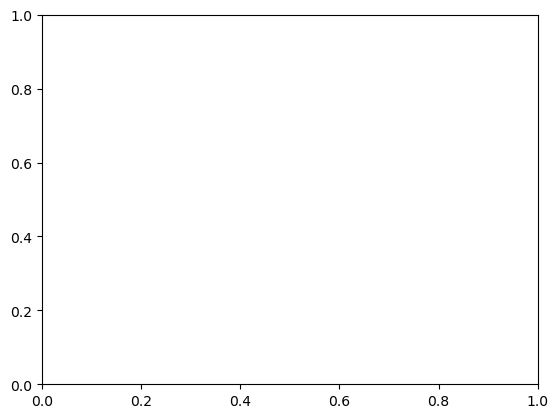

In [10]:
from matplotlib.pylab import *
axis()

如果是在交互模式下，并且使用了窗口后端，将会显示一 个只有坐标轴的空白图。 

这里的值分别表示xmin、xmax、ymin和ymax。同样，我们可 以设置x轴和y轴的值。

(-1.0, 1.0, -10.0, 10.0)

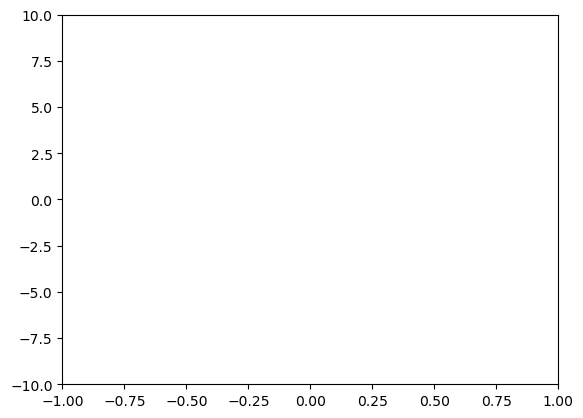

In [11]:
l = [-1, 1, -10, 10]
axis(l)

如果不使用axis()或者其他参数设置，matplotlib会自动使用最小值，刚好可以让我们在一个图中看到所有的数据点。如果设置 axis()，其范围比数据集合中的最大值小，matplotlib会按照设置 执行，这样就无法在图中看到所有的数据点了。这可能会引起用户困 惑甚至是错误的理解，因为我们认为我们看到了绘制的所有东西。避 免这种情况发生的方法之一是调用autoscale() (matplotlib.pyplot.autoscale())方法，该方法会计算坐标 轴的最佳大小以适应数据的显示。 

如果想要向相同图形添加新的坐标轴，可以调用 matplotlib.pyplot.axes()方法。我们通常会在方法中传入一些 属性，例如rect，归一化单位（0，1）下的left、bottom、 width、height4个属性，或者axisbg，该参数指定坐标轴的背景 颜色。 

还有其他一些参数允许我们对新添加的坐标轴进行设置，如 sharex/sharey参数，该参数接收其他坐标轴的值并让当前坐标轴 （x/y）共享相同的值；或者polar参数，指定是否使用极坐标轴 （polar axes）。 

添加新坐标轴在某些情况下非常有用，例如，如果需要用几个不同的视图来表达相同的数据的不同属性值，这就需要在一张图中组合显示多个图表。 

如果只想对当前图形添加一条线，可以调用 matplotlib.pyplot.axhline()或者 matplotlib.pyplot.axvline()。axhline()和axvline()方法会根据给定的x和y值相应地绘制出相对于坐标轴的水平线和垂直线。

这两个方法的参数很相似，axhline()方法比较重要的参数是y 向位置、xmin和xmax，axvline()方法比较重要的参数是x向位 置、ymin和ymax。

让我们在图表中看一下这些方法的图形

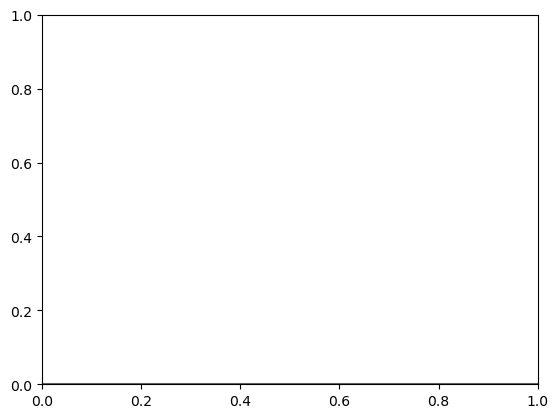

In [12]:
axhline()

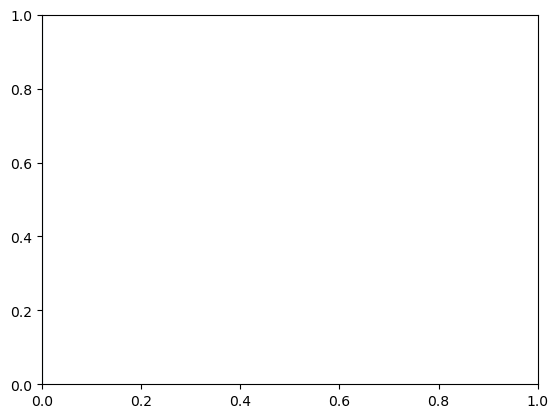

In [13]:
axvline()

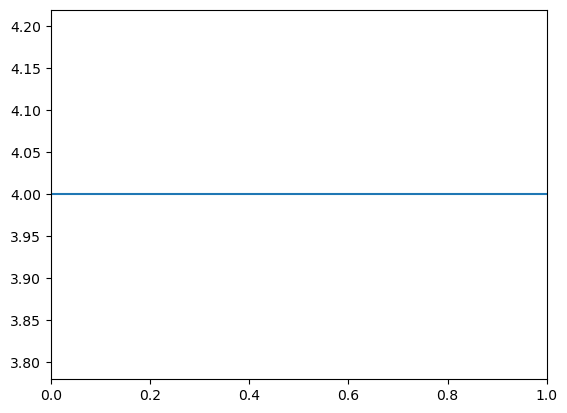

In [14]:
axhline(4)

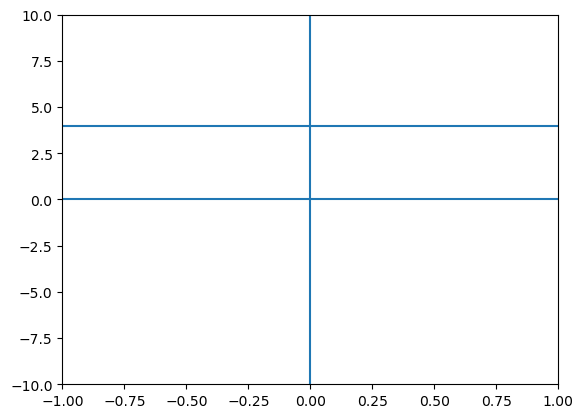

In [21]:
axis([-1, 1, -10, 10])
axvline(0)
axhline(0)
axhline(4)

在这里，我们看到调用这些方法时如果不传入参数，就会使用默认值。axhline()方法绘制了一条y=0的水平线，axvline()绘制了 一条x=0的垂直线。 

类似的，另外两个相关的方法允许我们添加一个跨坐标轴的水平 带（矩形），它们matplotlib.pyplot.axhspan()和 matplotlib.pyplot.axvspan()[2]。axhspan()方法必需的 ymin和ymax参数指定了水平带的宽度。同理，axvspan()方法必需 的xmin和xmax参数指定了垂直带的宽度。

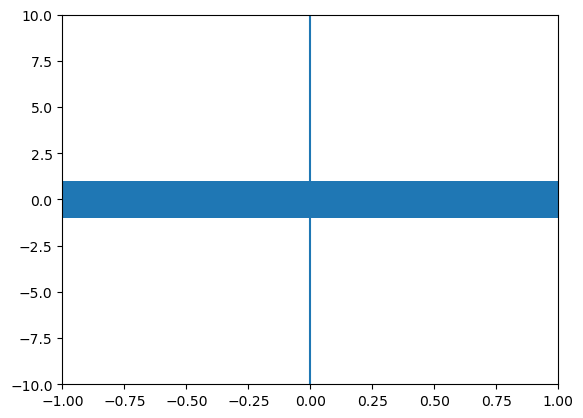

In [18]:
axis([-1, 1, -10, 10])
axhspan(-1, 1)
axvline(0)

图形中的网格属性默认是关闭的，但打开和定制化很简单。不带参数调用matplotlib.pyplot.grid()会切换网格的显示状态。另外一些控制参数如下。 

- which：指定绘制的网格刻度类型（major、minor或者 both）。 
- axis：指定绘制哪组网格线（both、x或者y）。 

坐标轴通常由matplotlib.pyplot.axis()控制。坐标轴在内 部实现上由几个Python类来表示。其中的一个父类是 matplotlib.axes.Axes，包含了操作坐标轴的大多数方法。单一 坐标轴由matplotlib.axis.Axis类来表示， matplotlib.axis. XAxis表示x轴，matplotlib.axis.YAxis 表示y轴。

## 设置图表的线型、属性和格式化字符串

首先学习如何改变线的属性，有下面几种方法可以改变图表中的线条。 

第一个常用的方式是给方法传入关键字参数来指定线型，例如 plot()方法。 

```python
plot(x, y, linewidth=1.5) 
```

对plot()方法的调用将返回一个线条的实例 （matplotlib.lines.Line2D），可以在这个实例上用一系列的 setter方法来设置不同的属性。

```python
line, = plot(x, y)
line.set_linewidth(1.5)
```

使用过MATLAB©的人会更习惯使用第三种方式配置线条属性——使 用setp()方法。

```python
lines = plot(x, y)
setp(lines, 'linewidth', 1.5)
```

不管你喜欢用哪种方式来配置线型，选择一种并在整个项目中 （或至少在一个文件中）保持一致。这样，当你（或者别人）将来再 看到代码时，会很容易理解和修改。

可以通过调用matplotlib.colors.get_named_colors_mapping()得到matplotlib支持的所有颜色

In [14]:
import matplotlib
matplotlib.colors.get_named_colors_mapping()

{'xkcd:cloudy blue': '#acc2d9',
 'xkcd:dark pastel green': '#56ae57',
 'xkcd:dust': '#b2996e',
 'xkcd:electric lime': '#a8ff04',
 'xkcd:fresh green': '#69d84f',
 'xkcd:light eggplant': '#894585',
 'xkcd:nasty green': '#70b23f',
 'xkcd:really light blue': '#d4ffff',
 'xkcd:tea': '#65ab7c',
 'xkcd:warm purple': '#952e8f',
 'xkcd:yellowish tan': '#fcfc81',
 'xkcd:cement': '#a5a391',
 'xkcd:dark grass green': '#388004',
 'xkcd:dusty teal': '#4c9085',
 'xkcd:grey teal': '#5e9b8a',
 'xkcd:macaroni and cheese': '#efb435',
 'xkcd:pinkish tan': '#d99b82',
 'xkcd:spruce': '#0a5f38',
 'xkcd:strong blue': '#0c06f7',
 'xkcd:toxic green': '#61de2a',
 'xkcd:windows blue': '#3778bf',
 'xkcd:blue blue': '#2242c7',
 'xkcd:blue with a hint of purple': '#533cc6',
 'xkcd:booger': '#9bb53c',
 'xkcd:bright sea green': '#05ffa6',
 'xkcd:dark green blue': '#1f6357',
 'xkcd:deep turquoise': '#017374',
 'xkcd:green teal': '#0cb577',
 'xkcd:strong pink': '#ff0789',
 'xkcd:bland': '#afa88b',
 'xkcd:deep aqua': '#0

这些颜色可以被用在matplotlib中带颜色参数的不同的方法中。 

如果这些基本的颜色不够用，可以用其他两种方式来定义颜色值。一种方法是使用HTML十六进制字符串。 

```python
color = '#eeefff' 
```

另一种是使用合法的HTML颜色名字（'red', 'chartreuse'）。也可以传入一个归一化到[0, 1]的RGB元组。 

```python
color = (0.3, 0.3, 0.4) 
```

有很多方法接收颜色参数，如title()。 

```python
title('Title in a custom color', color='#123456')
```


Text(0.5, 1.0, 'Title in a custom color')

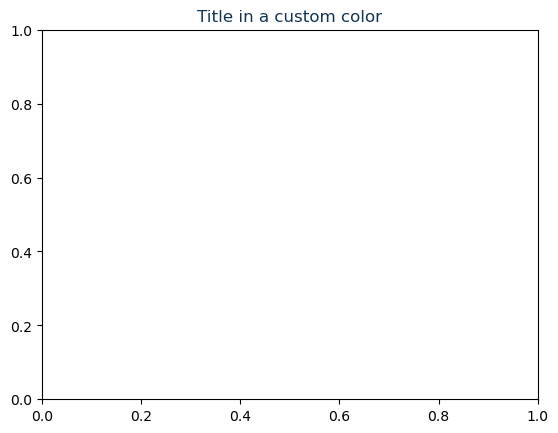

In [15]:
title('Title in a custom color', color='#123456')

通过向如matplotlib.pyplot.axes()或者 matplotlib.pyplot.subplot()这样的方法提供一个axisbg参数，我们可以指定坐标轴的背景色。

```python
subplot(111, axisbg=(0.1843, 0.3098, 0.3098))
```


## 设置刻度、刻度标签和网格

让我们先了解一下图形（figure）和子区[4]（subplots）。 

在matplotlib中，调用figure()会显式地创建一个图形，表示 一个图形用户界面窗口。通过调用plot()或类似的方法会隐式地创 建图形。这对于简单的图表没有问题，但是对于更高级的应用，能显 式地创建图形并得到实例的引用是非常有用的。 

一个图形包括一个或多个子区。子区能以规则网格的方式排列 plot。我们已经使用过subplot()方法，在调用时指定所有plot的行 数和列数以及要操作的plot的序号。 

如果需要更多的控制，我们需要使用matplotlib.axes.Axes 类的坐标轴实例。这样可以把plot放置在图形窗口中的任意位置，例 如可以把一个小的plot放在一个大的plot中。

刻度是图形的一部分，由刻度定位器（tick locator）——指定 刻度所在的位置、刻度格式器（tick formatter）——指定刻度显示 的样式两部分组成。刻度有主刻度（major ticks）和次刻度（minor ticks），默认不显示次刻度。更重要的是，主刻度和次刻度可以被独 立地指定位置和格式化。

我们可以使用matplotlib.pyplot.locator_params()方法 控制刻度定位器的行为。尽管刻度位置通常会被自行设置，我们仍然 可以控制刻度的数目，并且可以在图形比较小的时候使用紧凑视图 （tight view）。

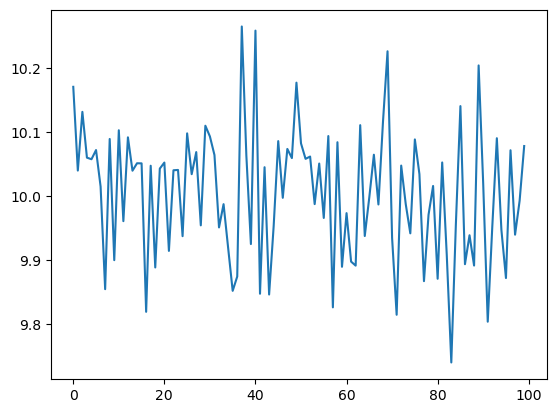

In [22]:
from pylab import *

# get current axis
ax = gca()

# set view to tight, and maximum number of tick intervals to 10
ax.locator_params(tight=True, nbins = 10)

# generate 100 normal distribution values
ax.plot(np.random.normal(10, .1, 100))

show()

我们可以看到x轴和y轴是如何被切分的，以及数值是如何显示 的。我们也可以用locator类完成相同的设置。下面的代码将主定位器 设置为10的倍数。 

```python
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))
```


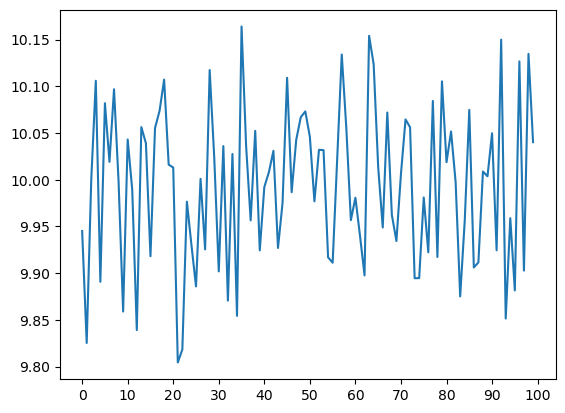

In [21]:
from pylab import *

# get current axis
ax = gca()

# set view to tight, and maximum number of tick intervals to 10
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))

# generate 100 normal distribution values
ax.plot(np.random.normal(10, .1, 100))

show()

刻度格式器的配置非常简单。格式器规定了值（通常是数字）的 显示方式。例如，用 matplotlib.ticker.FormatStrFormatter可以方便地指 定'%2.1f'或者'%1.1f cm'的格式字符串作为刻度标签。

我们可以用matplotlib.dates.date2num()、 matplotlib.dates.num2date()和 matplotlib.dates.drange()这样的helper方法对日期进行不同 形式的转换。

/tmp/ipykernel_7972/3871545434.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(dates, values, linestyle='-', marker='None')


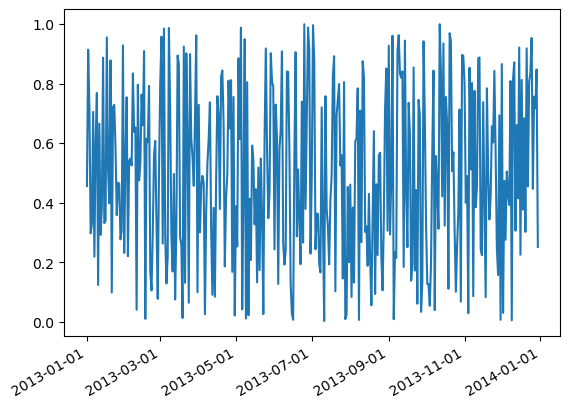

In [27]:
from pylab import *
import matplotlib as mpl
import datetime

fig = figure()

# get current axis
ax = gca()

# set some daterange
start = datetime.datetime(2013, 1, 1)
stop = datetime.datetime(2013, 12, 31)
delta = datetime.timedelta(days = 1)

# convert dates for matplotlib
dates = mpl.dates.drange(start, stop, delta)

# generate some random values
values = np.random.rand(len(dates))

ax = gca()
# create plot with dates

ax.plot_date(dates, values, linestyle='-', marker='None')

# specify formater
date_format = mpl.dates.DateFormatter('%Y-%m-%d')

# apply formater
ax.xaxis.set_major_formatter(date_format)

# autoformat date labels
# rotates labels by 30 degrees by default
# use rotate param to specify different rotation degree
# use bottom param to give more room to date labels
fig.autofmt_xdate()

show()

## 添加图例和注解

图例和注解清晰地解释了当前上下文中数据图表的内容。为每个 plot添加一个与所显示数据相关的简短描述，更方便读者（观察者） 理解。

让我们用下面的例子来演示一下如何添加图例和注解。

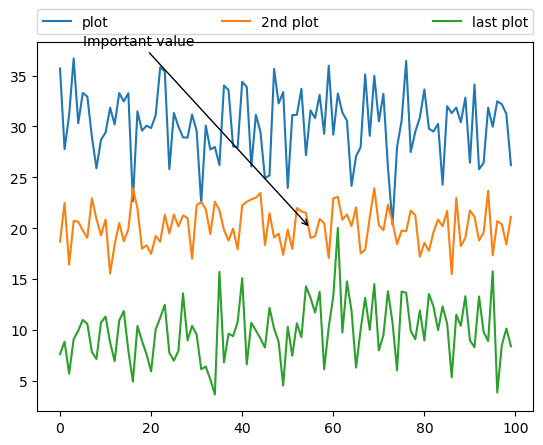

In [28]:
from matplotlib.pyplot import *

# generate different normal distributions
x1 = np.random.normal(30, 3, 100)
x2 = np.random.normal(20, 2, 100)
x3 = np.random.normal(10, 3, 100)

# plot them
plot(x1, label='plot')
plot(x2, label='2nd plot')
plot(x3, label='last plot')

# generate a legend box
legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, 
       ncol=3, mode="expand", borderaxespad=0.)

# annotate an important value
annotate("Important value", (55,20), xycoords='data',
         xytext=(5, 38),
         arrowprops=dict(arrowstyle='->'))

show()

我们所做的是为每个plot指定一个字符串标签，这样legend() 会把它们添加到图例框中。 

我们通过指定loc参数确定图例框的位置。这个参数是可选的， 这里我们为其指定一个位置，避免让图例框覆盖图表中的线。将位置参数设置为0是非常有用的，因为它会自动检查图表的位置，尽可能地避免图例和图表之间的重叠。

对于上例中的图例，我们设置列数为ncol=3，设置位置为 lower left。指定边界框（bbox_to_anchor）的起始位置为 (0.0, 1.02)，并且设置其宽度为1，高度为0.102。这些值都是基 于归一化轴坐标系。参数mode可以设置为None或者expand，当为 expand时，图例框会水平扩展至整个坐标轴区域。参数 borderaxespad指定了坐标轴和图例边界之间的间距。 

对于注解，我们在plot中为xy[5]坐标位置的数据点添加了一个字 符串描述。通过设置xycoord = 'data'，可以指定注解和数据使 用相同的坐标系。注解文本的起始位置通过xytext指定。 

箭头由xytext指向xy坐标位置。arrowprops字典中定义了很 多箭头属性。在这个例子中，我们用arrowstyle来指定箭头的风 格。

## 移动轴线到图中央

轴线定义了数据区域的边界，把坐标轴刻度标记连接起来。一共 有4个轴线，它们可以放置在任何位置。默认情况下，它们被放置在坐 标轴的边界，因此我们会看到数据图表有一个框。

为了把轴线移到图中央，需要把其中两个轴线隐藏起来（将 color设置为none）。然后，移动另外两个到坐标（0, 0）。坐标为 数据空间坐标。 

做法如下面代码所示。

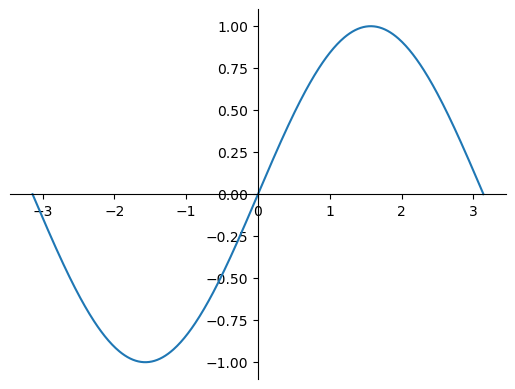

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 500, endpoint=True)
y = np.sin(x)

plt.plot(x, y)

ax = plt.gca()

# hide two spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# move bottom and left spine to 0,0
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

# move ticks positions
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()

这段代码是根据所绘制的图形设计的。我们把轴线移到位置（0， 0），绘制了一个正弦函数曲线。（0，0）是图形的中心。 

这段代码说明了如何把轴线移动到一个特定位置，以及如何去掉 不想显示的轴线。

另外，轴线可以被限制在数据结束的地方结束，例如通过调用 set_smart_bounds (True)。在这种情况下，matplotlib会尝试 以一种复杂的方式设置边界，例如处理颠倒的界限，或者在数据延伸 出视图的情况下裁剪线条以适应视图。

## 绘制直方图

直方图非常简单，但用它来显示正确的数据也是非常重要的。目 前我们仅涉及2D直方图。 

直方图被用于可视化数据的分布估计。在谈论直方图时我们通常 会使用一些术语。表示特定间隔中数据点频率的垂直矩形称为bin。 bin以固定的间隔创建，因此直方图的总面积等于数据点的数量。 

直方图可以显示数据的相对频率，而不是使用数据的绝对值。在 这种情况下，总面积就等于1。 

直方图经常被用在图像处理软件中，一般是作为可视化图像属性 （如给定颜色通道上光的分布）的一种方式。这些图像直方图可以进 一步应用在计算机视觉算法中来检测峰值，用来辅助边缘检测、图像 分割等。

在绘制直方图时，我们总是想设置正确的bin数量。但是因为没有 严格的规则来说明什么是最优bin数量，所以很难做到这一点。在怎样 计算bin数量上有几种不同的理论，最简单的一个是基于上取整 （ceiling）函数，这时bins(k)等于ceiling (max(x) – min(x)/h)，其中x是绘制的数据集合，h为期望的bin宽度。这只是 一种理论，因为正确显示数据的bin数量取决于真实的数据分布。

如果想调用matplotlib.pyploy.hist()来创建直方图，我们 需要传入一些参数，下面是一些比较重要的参数。 

- bins：可以是一个bin数量的整数值，也可以是表示bin的一个序 列。默认值为10。 
- range：bin的范围，当bins参数为序列时，此参数无效。范围外 的值将被忽略掉，默认值为None。
- normed：如果值为True，直方图的值将进行归一化 （normalized）处理，形成概率密度。默认值为False。
- histtype：默认为bar类型的直方图。其他选项如下。 
  - barstacked：用于多种数据的堆叠直方图。 
  - step：创建未填充的线形图。 
  - stepfilled：创建默认填充的线形图。histtype的默认 值为bar。

- align：用于bin边界之间矩形条的居中设置。默认值为mid，其 他值为left和right。

- color：指定直方图的颜色，可以是单一颜色值或者颜色的序 列。如果指定了多个数据集合，颜色序列将会设置为相同的顺 序。如果未指定，将会使用一个默认的线条颜色。

- orientation：通过设置orientation为horizontal创建水 平直方图。默认值为vertical。 

下面的代码演示了hist()的用法。

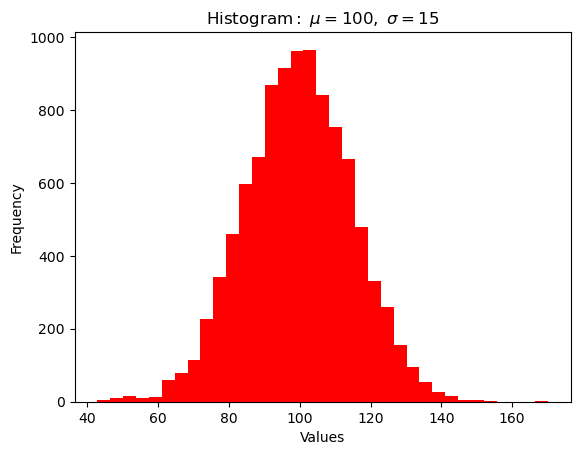

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu = 100
sigma = 15
x = np.random.normal(mu, sigma, 10000)

ax = plt.gca()

# the histogram of the data
ax.hist(x, bins=35, color='r')

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')

ax.set_title(r'$\mathrm{Histogram:}\ \mu=%d,\ \sigma=%d$' % (mu, sigma))

plt.show()

首先，生成一些正态分布数据，然后指定直方图的bin数量为35， 通过设置normed为True（或1）来进行归一化处理，最后设置 color为red(r)。 

接下来，为图形添加标签和标题。这里我们利用matplotlib对 LaTex表达式的支持，从而在Python格式化字符中加入了数学符号。

## 绘制误差条形图

我们可以用误差条来可视化数据集合中的测量不确定度 （uncertainty of measurement）或者指明错误。误差条可以很容易 地表示误差偏离数据集合的情况。它们可以显示一个标准差 （standard deviation）、一个标准误差（standard error）以及95% 的置信区间（confidence interval）。因为在表示上没有统一标准， 所以我们总是需要显式地表明误差条显示的是哪一种值（误差）。实 验科学（experimental science）领域的大多数论文都应该在描述数 据精度的时候包含误差条。

虽然只有两个必选参数——left和height，但是，我们经常会 需要使用其他参数，介绍如下。 

- width：给定误差条的宽度，默认值是0.8。 
- bottom：如果指定了bottom，其值会被加到高度中，默认值为 None。 
- edgecolor：给定误差条边界颜色。 
- ecolor：指定误差条的颜色。 
- linewidth：误差条边界宽度，可以设为None（默认值）和 0（此时误差条边界将不显示出来）。
- orientation：有vertical和horizontal两个值。 
- xerr和yerr：用于在柱状图上生成误差条。 

一些可选参数（color、edgecolor、linewidth、xerr和 yerr）可以是单一值，也可以是和误差条数目相同长度的序列。

让我们用一个例子来说明误差条形图的绘制。

/tmp/ipykernel_12012/1540820826.py:8: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


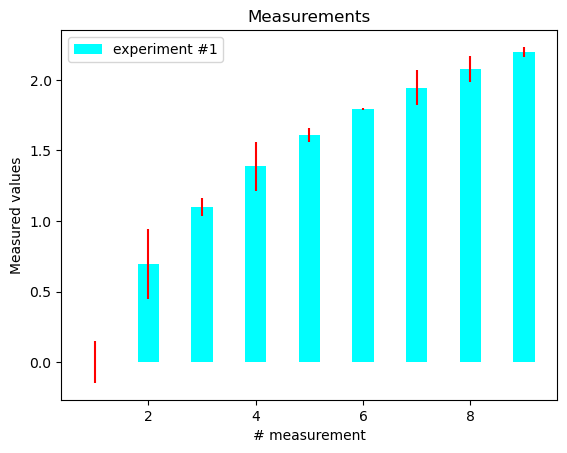

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# generate number of measurements
x = np.arange(0, 10, 1)

# values computed from "measured"
y = np.log(x)

# add some error samples from standard normal distribution
xe = 0.1 * np.abs(np.random.randn(len(y)))

# draw and show errorbar
plt.bar(x, y, yerr=xe, width=0.4, align='center', ecolor='r',
        color='cyan', label='experiment #1');

# give some explainations
plt.xlabel('# measurement')
plt.ylabel('Measured values')
plt.title('Measurements')
plt.legend(loc='upper left')

plt.show()

为了绘制误差条，我们需要有一些度量值（x）。对于每一个度 量值计算出的值（y），我们引入误差（xe）。 

这里，我们用NumPy库来生成并计算值。标准分布已经能很好地满 足演示的需要了，但是如果正好预先知道你的数据分布，那么可以做 一些可视化原型来尝试一下不同的视图布局，以便找到展示信息的最 佳选择。

## 绘制饼图

饼图在很多方面很特别，最重要的一点是它显示的数据集合加起 来必须等于100%，否则它就是无意义的、无效的。

饼图可以描述数值的比例关系，其中每个扇区的弧长大小为其所 表示的数量的比例。

下面演示用饼图呈现数据的不同方式。

首先，创建一个分裂式饼图（exploded pie chart）。

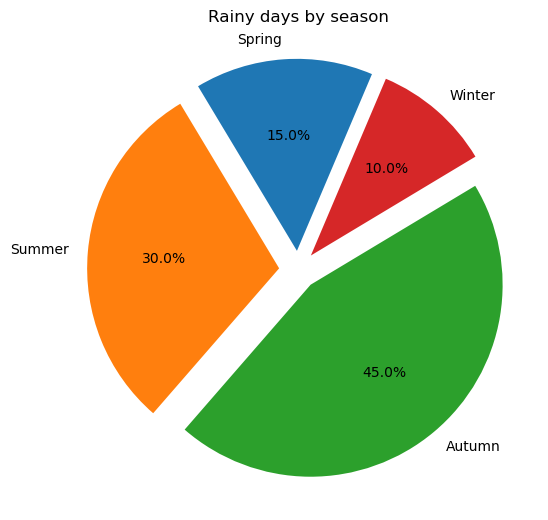

In [4]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# the slices will be ordered
# and plotted counter-clockwise.
labels = 'Spring', 'Summer', 'Autumn', 'Winter'

# fractions are either x/sum(x) or x if sum(x) <= 1
x = [15, 30, 45, 10]

# explode must be len(x) sequence or None
explode=(0.1, 0.1, 0.1, 0.1)

pie(x, explode=explode, labels=labels,
    autopct='%1.1f%%', startangle=67)

title('Rainy days by season')

show()

饼图的每部分的定义为x/sum(x)，或者在sum(x) <= 1为x。 通过给定一个分裂序列，我们可以获得分裂的效果，其中每一个元素 表示每个圆弧间偏移量，具体为半径的百分比。用autopct参数来格 式化绘制在圆弧中的标签，标签可以是一个格式化字符串或者是一个 可调用的对象（函数）。 

我们也可以使用一个布尔值的阴影参数为饼图添加阴影效果。 

如果没有指定startangle，扇区将从x轴（角度0）开始逆时针 排列；如果指定atartangle的值为90，饼图将从y轴开始。

## 绘制带填充区域的图表

借助matplotlib库，我们可以为曲线之间或者曲线下面的区域填充颜色，这样就可以向读者显示那部分区域的值。有些时候，这对读 者（观察者）理解给定的特定信息是非常有帮助的。

下面是一个如何填充两个轮廓线之间的区域的例子。

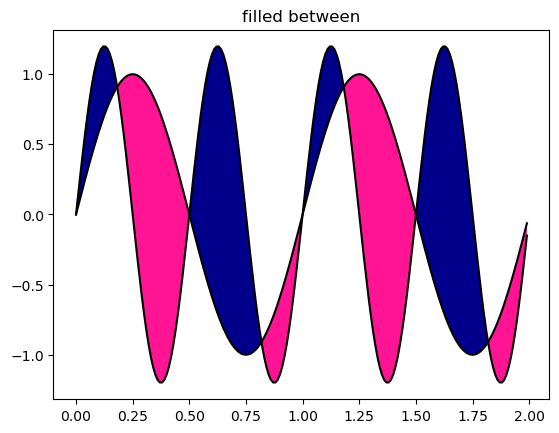

In [5]:
from matplotlib.pyplot import figure, show, gca
import numpy as np

x = np.arange(0.0, 2, 0.01)

# two different signals are measured
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig = figure()
ax = gca()

# plot and
# fill between y1 and y2 where a logical condition is met
ax.plot(x, y1, x, y2, color='black')

ax.fill_between(x, y1, y2, where=y2>=y1, facecolor='darkblue',
                interpolate= True)
ax.fill_between(x, y1, y2, where=y2<=y1, facecolor='deeppink',
                interpolate= True)

ax.set_title('filled between')

show()

在生成预定义间隔的随机信号之后，用常规的plot()方法绘制出这两个信号的图形。然后，调用fill_between()并传入所需的必选参数。 

fill_between()方法使用x为定位点，选取y值 （y1, y2），然后用几种预定义的颜色绘制出多边形。

用where参数指定一个条件来填充曲线，where参数接收布尔值 （可以是表达式），这样就只会填充满足where条件的区域。

像许多其他用于绘图的函数一样，fill_between()方法也接收 许多参数，比如hatch（指定填充的样式替代颜色）和线条选项 （linewidth和linestyle）。 

另外一个方法是fill_betweenx()，该方法有相似的填充特 性，但是它是针对水平曲线的。

更通用的fill()方法提供了对任意多边形填充颜色或者阴影线 的功能。

## 绘制堆积图

在绘制数量时，堆积图表示不同部分在总量中的比重。堆积图不仅能表现总体趋势，也能表现构成总体数量的每一个独立部分的趋势。

这里是绘制堆积图的代码。

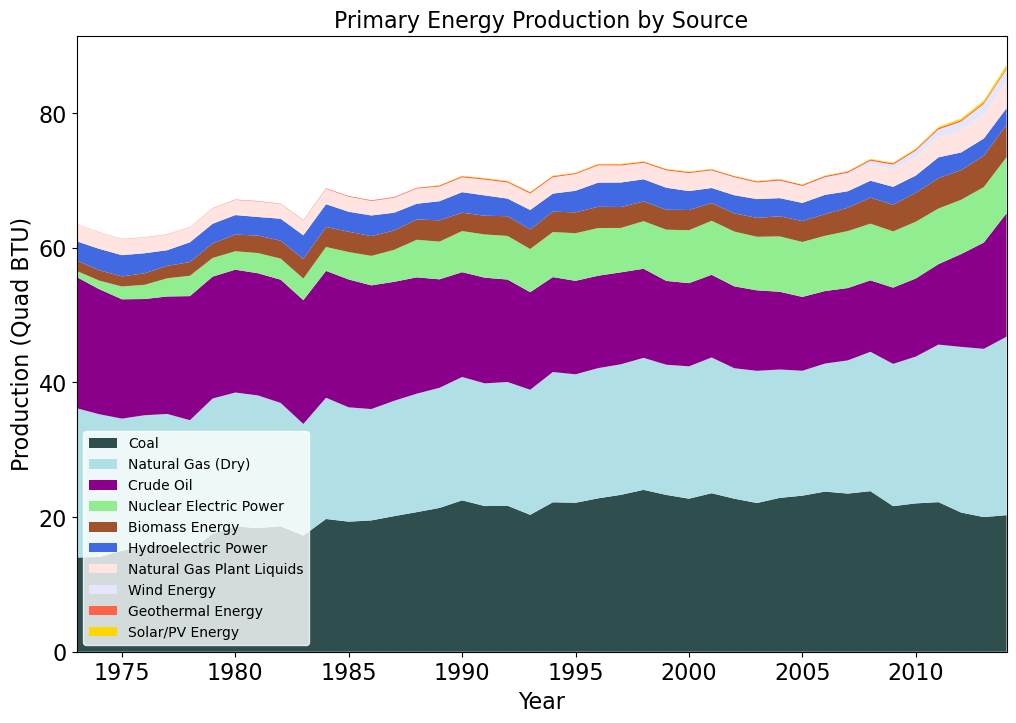

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# We load the data with pandas.
df = pd.read_csv('energy-production.csv')

# We give names for the columns that we want to load. Different types
# of energy have been ordered by total production values).
columns = ['Coal', 'Natural Gas (Dry)', 'Crude Oil', 'Nuclear Electric Power',
           'Biomass Energy', 'Hydroelectric Power', 'Natural Gas Plant Liquids', 
           'Wind Energy', 'Geothermal Energy', 'Solar/PV Energy']

# We define some specific colors to plot each type of energy produced.
colors = ['darkslategray', 'powderblue', 'darkmagenta',
          'lightgreen', 'sienna', 'royalblue', 'mistyrose', 'lavender', 'tomato', 'gold']

# Let's create the figure.
plt.figure(figsize = (12,8))
polys = plt.stackplot(df['Year'], df[columns].values.T, colors = colors)

# The legend is not yet supported with stackplot. We will add it manually.
rectangles= []
for poly in polys:
    rectangles.append(plt.Rectangle((0, 0), 1, 1,fc=poly.get_facecolor()[0]))
legend = plt.legend(rectangles, columns, loc = 3)
frame = legend.get_frame()
frame.set_color('white')

# We add some information to the plot.
plt.title('Primary Energy Production by Source', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Production (Quad BTU)', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(1973,2014)

# Finally we show the figure.
plt.show()

stackplot()方法和plot()方法很相似，只不过它的第二个参 数是一个多维数组。该数组的第一维度是填充区域的数目，第二个维 度和第一个参数数组相同。在上面这个例子中，df['Year']的形状 是(42,)，df[columns].values.T的形状是(10, 42)。注意， 这里为了确保第二个数组的格式正确，我们使用了转置操作符T。 stackplot()返回了一个多边形的列表，我们把它保存在变量 polys中。 

堆积图目前还不支持图例。因此我们使用plt.Rectangle()方法创建图例矩形。每个矩形的颜色用poly.get_facecolor()[0] 指定，这里的ploy是stackplot()方法创建的多边形列表中的元素。 

然后，我们使用legend()方法绘制图例，图例矩形作为第一个参数，每种能源类型对应的名字作为第二个参数，第三个参数用来指 定图例的位置。设置图例背景为白色。做法是首先通过图例对象的 get_frame()方法获得图框对象，然后调用其set_color()方法设置颜色。

## 绘制带彩色标记的散点图

如果有两个变量，并且想标记出它们之间的相关关系 （correlation），散点图是解决方案之一。 

这种类型的图形也非常有用，它是多维数据可视化进阶的基础， 比如绘制散点图矩阵（scatter plot matrix）。

散点图显示两组数据的值。数据可视化的工作由一组不由线条连 接的点完成。每个点的坐标位置由变量的值决定。一个变量是自变量 （或称为无关变量，independent variable），另一个是应变量（或 称为相关变量，dependent variable）。应变量通常绘制在y轴上。

下述代码绘制了两幅图，一个是不相关数据，另一个是强正相关 数据（strong positive correlation）。

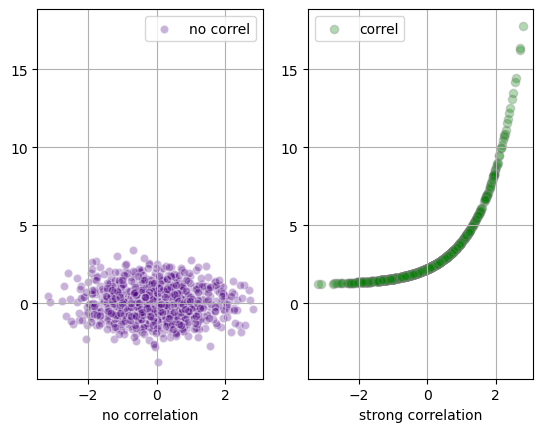

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# generate x values
x = np.random.randn(1000)

# random measurements, no correlation
y1 = np.random.randn(len(x))

# strong correlation
y2 = 1.2 + np.exp(x)

ax1 = plt.subplot(121)
plt.scatter(x, y1, color='indigo', alpha=0.3, edgecolors='white',
            label='no correl')
plt.xlabel('no correlation')
plt.grid(True)
plt.legend()

ax2 = plt.subplot(122, sharey=ax1, sharex=ax1)
plt.scatter(x, y2, color='green', alpha=0.3, edgecolors='grey',
            label='correl')
plt.xlabel('strong correlation')
plt.grid(True)
plt.legend()

plt.show()

在这里，我们也使用了很多参数，如用来设置图形颜色的 color、用来设置点状标记（默认是circle）的marker、 alpha（alpha透明度）、edgecolors（标记的边界颜色）和 label（用于图例框）。

散点图通常在应用拟合回归函数之前绘制，用来识别两个变量间 的关联。它很好地呈现了相关性的视觉画面，尤其是对于非线性关系 的数据。matplotlib提供的scatter()函数用来绘制相同长度的一维 数组x与y之间的散点图。